In [1]:
## Importing needed packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file


#For plotting Gaussian
from scipy.optimize import curve_fit
from astropy import modeling
from scipy.stats import norm
import math
import seaborn as sns
from scipy.signal import find_peaks
import scipy.stats as stats
import scipy.stats
from scipy import ndimage

In [2]:
#Fitting a Gaussian

location = "/Users/RuheeJanmohamed/Desktop/Data/co_zero_south.fits"

hdul = fits.open(location)

hdu_zero_south = hdul[0]

co_zero_south = hdu_zero_south.data

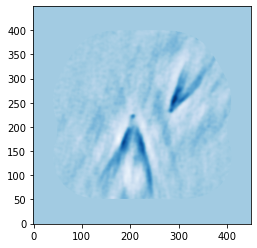

In [3]:
plt.imshow(co_zero_south,cmap='Blues',origin='lower')
#convert single gauss to double gauss (similar procedure)
#if not working, write down why, then try image rotation with seperating sides
#image rotation for other outflow (same tech)

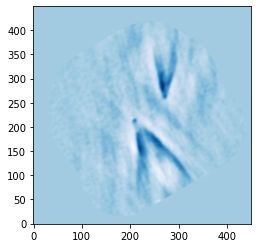

In [4]:
im_rot = ndimage.rotate(co_zero_south, angle=-30,reshape=False)
plt.imshow(im_rot,cmap='Blues',origin='lower')

In [5]:
cut = co_zero_south[150,:]

[1609.38052145  225.13340935    6.36907968]
1671.3671875
[227]
[1160.16267986  179.18547533    7.86070823]
1139.9028930664062
[179]
[22.0855476   0.17267479  0.17365615]


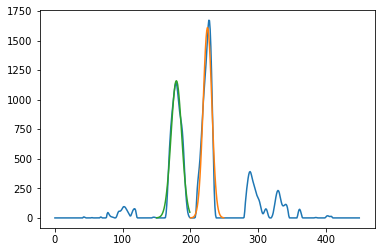

In [6]:
#Fitting Gausian to one curve first

cut = co_zero_south[140:150,:]
cut[cut<0]=0
avg_cut = np.mean(cut,axis=0)

plt.plot(range(450),avg_cut)

#Trying to plot Gaussian Error   
def Line_Fit(x,m,b):
    f = x*m +b
    return f

#B x position (y) which becomes x - xo
def Gauss(x,amp,mean,sigma):
    f = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return f

xdata=np.arange(200,250)
ydata=avg_cut[200:250]

#amp,mean,sigma,offset
p0 = (np.max(ydata),xdata[np.argmax(ydata)],5)

p_opt,p_cov = curve_fit(Gauss,xdata,ydata,p0)
plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))

print(p_opt)
print(np.max(ydata))
print(xdata[ydata==np.max(ydata)])

x2data=np.arange(150,200)
y2data=avg_cut[150:200]

p0 = (np.max(y2data),x2data[np.argmax(y2data)],5)

p_opt,p_cov = curve_fit(Gauss,x2data,y2data,p0)
plt.plot(x2data,Gauss(x2data,p_opt[0],p_opt[1],p_opt[2]))

print(p_opt) #use as inital guess
print(np.max(y2data)) #intensity (i)
print(x2data[y2data==np.max(y2data)])

print(np.sqrt(np.diag(p_cov))) #covariance matrix (how they interact with each other)

In [7]:
# def Gauss_Left(p0, p_opt ,p_cov, Gauss,avg_cut):
#     xdata=np.arange(200,250)
#     ydata=avg_cut[200:250]
    
#     p0 = (np.max(ydata),xdata[np.argmax(ydata)],5)
#     p_opt,p_cov = curve_fit(Gauss,xdata,ydata,p0)
    

## Right Hand Gaussian Loop

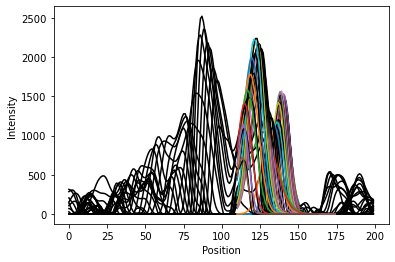

In [8]:
Model_Values = open("RightHand_Model_Values.txt", "w")

Model_Values.write("Right Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")

off_x1 = 100
off_x2 = 300

ycut_list=[(70+(i*5),70+((i+1)*5)) for i in range(26)]
for ycut in ycut_list:
    cut = co_zero_south[ycut[0]:ycut[1],off_x1:off_x2]
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    xdata=np.arange(110,175)
    idata=avg_cut[110:175]
    
    p0 = (np.max(idata),xdata[np.argmax(idata)],5)

    p_opt,p_cov = curve_fit(Gauss,xdata,idata,p_opt)
    
    plt.plot(range(200),avg_cut,c='k')
    plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1]+off_x1,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (xdata[idata==np.max(idata)]+off_x1))
    Model_Values.write("%f\t" % np.max(idata))
    Model_Values.write("\n")
    
plt.xlabel("Position")
plt.ylabel("Intensity")

Model_Values.close()

## Left Hand Gaussian

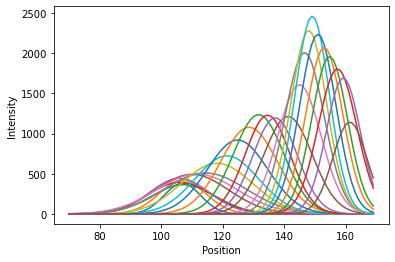

In [9]:
Model_Values = open("LeftHand_Model_Values.txt", "w")

Model_Values.write("Left Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")
#50,250
off_x3 = 40
off_x4 = 210



for ycut in ycut_list:
    cut = co_zero_south[ycut[0]:ycut[1],off_x3:off_x4]
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    x2data=np.arange(70,170)
    i2data=avg_cut[70:170]
    
    p0 = (np.max(i2data),x2data[np.argmax(i2data)],5)

    p_opt,p_cov = curve_fit(Gauss,x2data,i2data,p0)
    
    #plt.plot(range(200),avg_cut, c="k")
    plt.plot(x2data,Gauss(x2data,p_opt[0],p_opt[1],p_opt[2]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1]+off_x3,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (x2data[i2data==np.max(i2data)]+off_x3))
    Model_Values.write("%f\t" % np.max(i2data))
    Model_Values.write("\n")
    
plt.xlabel("Position")
plt.ylabel("Intensity")
Model_Values.close()

## Reading in and plotting right hand file

In [10]:
ycut_right, xfit_right = np.genfromtxt("RightHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])

print(ycut_right)

[ 72.5  77.5  82.5  87.5  92.5  97.5 102.5 107.5 112.5 117.5 122.5 127.5
 132.5 137.5 142.5 147.5 152.5 157.5 162.5 167.5 172.5 177.5 182.5 187.5
 192.5 197.5]


## Linear Fit of Right Hand Data

[-2.49180442e-01  2.62462929e+02]
[0.00921957 1.29176888]


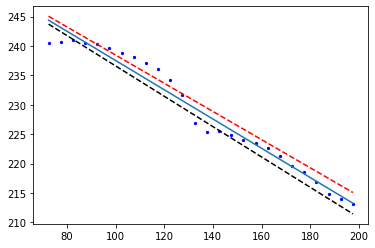

In [11]:
l_opt,l_cov = curve_fit(Line_Fit,ycut_right,xfit_right) #xfit_right err term (sigma)

plt.plot(ycut_right,Line_Fit(ycut_right,l_opt[0],l_opt[1]))
plt.scatter(ycut_right, xfit_right,s = 5, color = 'b', label = 'Data points') #Original data points

Err =np.sqrt(np.diag(l_cov))

print(l_opt)
print(Err)
plt.plot(ycut_right,Line_Fit(ycut_right,l_opt[0]+Err[0],l_opt[1]),c="r",ls="--") #Error range
plt.plot(ycut_right,Line_Fit(ycut_right,l_opt[0]-Err[0],l_opt[1]),c="k",ls="--")

In [ ]:
#Write 

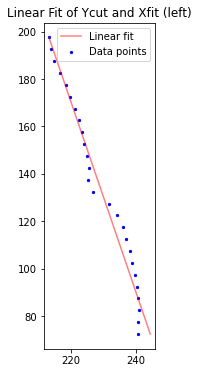

-0.24918044184615432


In [12]:
fit = np.polyfit(ycut_right, xfit_right,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_right + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_right,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_right, ycut_right,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

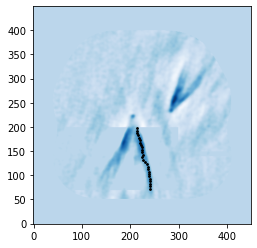

In [13]:
plt.imshow(co_zero_south,cmap='Blues',origin='lower')
plt.scatter(xfit_right,ycut_right, s=3, c='k')
ax.plot(ycut_right, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')

## Reading in and Plotting for Left Hand

In [14]:
ycut_left, xfit_left = np.genfromtxt("LeftHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])


## Linear Fit of Left Hand Data

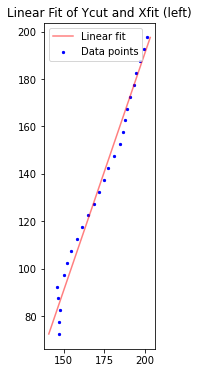

0.5022397846837605


In [15]:
fit = np.polyfit(ycut_left, xfit_left,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_left + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_left,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_left, ycut_left,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

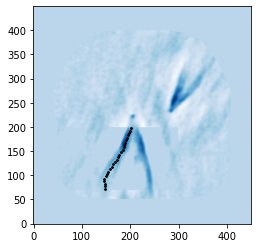

In [16]:
plt.imshow(co_zero_south,cmap='Blues',origin='lower')
plt.scatter(xfit_left,ycut_left, s=3, c='k')
#plt.scatter(xfit_right,ycut_right, s=3, c='k')

# Plotting Fit on top of Outflow


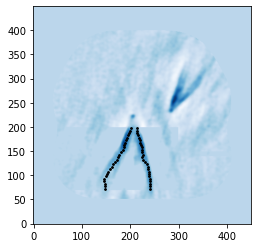

In [17]:
plt.imshow(co_zero_south,cmap='Blues',origin='lower')
plt.scatter(xfit_left,ycut_left, s=3, c='k')
plt.scatter(xfit_right,ycut_right, s=3, c='k')
plt.savefig('Main_Southern_Gaussian.pdf')